# <span style='color:#FE774C'>EMODnet Human Activity </span> Example Notebook

#### We recommend duplicating this notebook if you want to make changes to the code or run additional analyses
To do that simply right click on the file on the left panel and select "duplicate"

### The first part of this notebook will show how to pull data, and run visualizations using functions
### The second part uses a gui based approach

In [1]:
import odp.geospatial as odp
import warnings
import cmocean

warnings.filterwarnings("ignore")

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.1-CAPI-1.17.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
db = odp.Database()
db_plt = odp.PlotTools()
gd = odp.GridData()

### Part 1: Using Functions

#### The following shows the available datasets that can be used as dataframes. To see gridded datasets, run *gd.datasets_table* instead. 
#### Alternatively check out the data catalog in the [Ocean Data Explorer Catalog](https://app.oceandata.earth/catalog)

In [3]:
db.datasets

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Database Casts,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of the casts of the World Ocean Databa...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...","[celsius, dimensionless, micromole per kilogra..."
World Ocean Database Measurements,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of measurements taken from all the cas...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...","[celsius, dimensionless, micromole per kilogra..."
Marine Regions - IHO Sea Areas,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,None,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region]",None
Marine Regions - Intersect EEZ IHO Sea,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The intersect of the Exclusive Economic Zones ...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region, eez]",None
Marine Regions - World EEZ,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,Maritime Boundaries and Exclusive Economic Zon...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world, region, eez]",None
Marine Regions - World Marine Heritage Sites,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,World Marine Heritage Sites version 1,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world marine heritage sites, reg...",None
Marine Regions - EEZ Land Union,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The union of world country boundaries and EEZ's,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, region, eez]",None
Ocean Biodiversity Information System,[OBIS],Most comprehensive gateway to the world’s ocea...,None,https://obis.org/,OBIS (YEAR) Ocean Biodiversity Information Sys...,global ocean biodiversity,"[biodiversity, species, taxa, ocean]",None
World Register of Marine Species,[WoRMS],Authoritative and comprehensive list of names ...,None,https://www.marinespecies.org/index.php,WoRMS Editorial Board (2022). World Register o...,authoritative list of marine species,"[marine species, biodiversity, register]",None


#### <span style='color:#3464eb'> Emodnet data available from catalog:<span>
    
You can query data using the data catalog index name. Let's focus here on Emodnet dataset.

In [4]:
df_db = db.datasets
emodnet_list = [name for name in df_db.index if 'Emodnet' in name]
emodnet_list

['Emodnet HA aquaculture - marine Finfish',
 'Emodnet HA aquaculture - shellfish',
 'Emodnet HA algae production',
 'Emodnet HA offshore installations',
 'Emodnet HA wells',
 'Emodnet HA pipelines',
 'Emodnet HA windfarms']

## Pulling data - <span style='color:#FE774C'> Example with Emodnet HA - shellfish </span> 


#### Insert the name of the table you are interested in into the query function
This returns a [geopandas](https://geopandas.org/en/stable/docs.html) dataframe with a geometry column<br>
There are many built-in functions you can use with these geopandas dataframes

In [5]:
shellfish_db = emodnet_list[0]

In [6]:
df = db.query(shellfish_db)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    2561 non-null   int64   
 1   COUNTRY     2561 non-null   object  
 2   OWNER_NAME  2561 non-null   object  
 3   PRODUCTION  2561 non-null   object  
 4   PURPOSE     2561 non-null   object  
 5   SPECIES_DE  2561 non-null   object  
 6   SITE_ID     2561 non-null   object  
 7   COAST_DIST  2561 non-null   float64 
 8   POSITION_C  2561 non-null   object  
 9   STATUS      2561 non-null   object  
 10  POINT_INFO  2561 non-null   object  
 11  COD         2561 non-null   object  
 12  HALIBUT     2561 non-null   object  
 13  LUMPFISH    2561 non-null   object  
 14  EEL         2561 non-null   object  
 15  SALMON      2561 non-null   object  
 16  SEABASS     2561 non-null   object  
 17  SEABREAM    2561 non-null   object  
 18  TROUT       2561 non-null   object  
 19

In [7]:
df.head()

,OBJECTID,COUNTRY,OWNER_NAME,PRODUCTION,PURPOSE,SPECIES_DE,SITE_ID,COAST_DIST,POSITION_C,STATUS,...,SEABASS,SEABREAM,TROUT,TUNA,TURBOT,SOLE,OTHER_SPEC,FARM_TYPE,PRODUCTI_1,geometry
0,1,Spain,"ESTEROS MANGUITA, S.L.",Grow out for human consumption,n.a.,"Eel (Anguilla anguilla), European seabass (Dic...",ES_0001,585.283754,Within the coastline,n.a.,...,Yes,Yes,No,No,No,Yes,Yes,Diversified farm,Saltwater ponds,POINT (-6.17444 36.44119)
1,2,Spain,"ACUICULTURA ROQUETA, S.A.",n.a.,n.a.,"Eel (Anguilla anguilla), European seabass (Dic...",ES_0002,46.663899,Within the coastline,n.a.,...,Yes,Yes,No,No,No,No,No,Diversified farm,n.a.,POINT (-6.24601 36.46482)
2,3,Spain,"BLENNIUS, S.C.A.",n.a.,n.a.,"Eel (Anguilla anguilla), European seabass (Dic...",ES_0003,2090.318606,Within the coastline,n.a.,...,Yes,Yes,No,No,No,No,No,Diversified farm,n.a.,POINT (-6.16763 36.48905)
3,4,Spain,"ESTEROS DE SANCTI PETRI, S.A.",n.a.,n.a.,"Eel (Anguilla anguilla), European seabass (Dic...",ES_0004,80.395788,At sea,n.a.,...,Yes,Yes,No,No,No,No,No,Diversified farm,Saltwater ponds,POINT (-6.19739 36.38963)
4,5,Spain,MOLINERA DEL SUR S.A.,Broodstock,n.a.,"Common sole (Solea solea, S. vulgaris), Eel (A...",ES_0005,950.071873,Within the coastline,n.a.,...,Yes,Yes,No,No,No,Yes,Yes,Diversified farm,Saltwater ponds,POINT (-6.18603 36.42511)


#### <span style='color:#3464eb'>You can also access citation information, databsase description etc.

In [8]:
db.datasets.loc[emodnet_list[0]].database_description

'The database on marine finfish aquaculture in the EU was created in 2017 by AND-International for the European Marine Observation and Data Network (EMODnet). The dataset provides information about the location of marine finfish farms in the EU and partner countries where data are available. There is an obligation for EU MS to inventory all authorized aquaculture sites under the Council Directive 2006/88/EC on animal health requirements. Despite this obligation, the availability of data varies among MS from no data available at all to a complete regularly updated dataset (e.g.in Ireland). As far as partner countries are concerned, data have been collected only in Norway and the UK (Scotland only) at this stage, where detailed data are provided online. Data provided here cover Cyprus, Danmark, Finland, Greece, Ireland, Malta, Norway, Spain and the UK (Scotland only). Data collection is still undergoing in other EU MS and neighbouring countries. Each point has the following attributes (w

### <span style='color:#9D59F4'> Plot the data </span> using built-in functions
#### Here we create a static plot of the casts we pulled

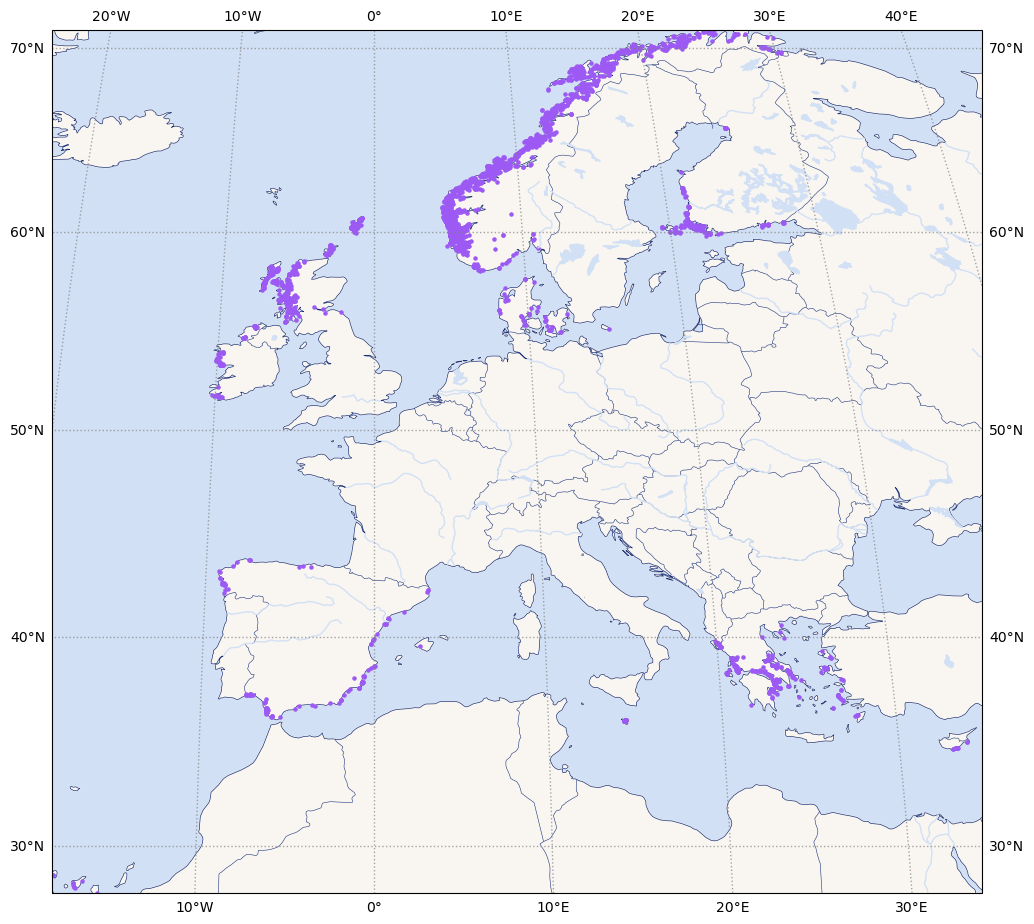

In [9]:
# plotting only the points
db_plt.plot_points(df)

### Add <span style='color:#9D59F4'> filters </span> to the data pull

You can filter for a specific value in a column, or a specific geographical area

#### For example, if we are only interested in farms from a specific country and for a specific species:
First let's make the filter using the filter_data functions<br>
Input the column, the operator, and the value you want to filter on

In [10]:
filter1 = db.filter_data("COUNTRY", "=", "France")
filter2 = db.filter_data("FARM_TYPE", "=", "Mussels")

In [11]:
df = db.query(shellfish_db, filters=[filter1, filter2])

In [12]:
df.head()

,OBJECTID,COUNTRY,OWNER_NAME,PRODUCTION,PURPOSE,SPECIES_DE,SITE_ID,COAST_DIST,POSITION_C,STATUS,...,SEABASS,SEABREAM,TROUT,TUNA,TURBOT,SOLE,OTHER_SPEC,FARM_TYPE,PRODUCTI_1,geometry


#### We can also create an interactive plot (will show only when cell is run)

In [13]:
db_plt.plot(df)

{
  "initialViewState": {
    "latitude": 0,
    "longitude": 0,
    "zoom": 1
  },
  "layers": [
    {
      "@@type": "PointCloudLayer",
      "autoHighlight": true,
      "data": [],
      "getColor": [
        25,
        25,
        255
      ],
      "getNormal": [
        0,
        0,
        -10000
      ],
      "getPosition": "@@=geometry.coordinates",
      "id": "74918c89-212d-42e3-83b2-e23b6a2c50fa",
      "pickable": true,
      "pointSize": 3
    }
  ],
  "mapProvider": "mapbox",
  "mapStyle": "mapbox://styles/oceandatafoundation/ckbujyuqu0kah1kpbctq4lemg",
  "views": [
    {
      "@@type": "MapView",
      "controller": true
    }
  ]
}

## Part 2: Using interactive GUI

#### You can pick to pull EMODnet human activity datasets dropdown. These datasets don't take time inputs

In [14]:
db.selector()

GridspecLayout(children=(Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zo…

In [15]:
df = db.data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


In [16]:
df.head()

""
